In [1]:
#https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import style

style.use('dark_background')
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["figure.figsize"] = (15,8)

# Read CSV

In [2]:
KB_csv_file = "Dataset/KB_APT_tradeIndex.csv" # KB 주택가격동향
KB = pd.read_csv(KB_csv_file, index_col="날짜", parse_dates=True)
KB = KB.dropna(axis=1) # ['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산']
KB = KB.apply(lambda x:(x/x[0])*100) -100  # 1986.01 기준 100
KB

,전국,서울,부산,대구,인천,광주,대전,울산
날짜,,,,,,,,
1986-01-31,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
1986-02-28,0.000000,0.173310,0.431965,0.000000,-4.263256e-14,0.567108,0.000000,-1.828154e-01
1986-03-31,-0.184162,0.000000,0.000000,0.539568,-7.961783e-01,-1.134216,-0.346821,-1.279707e+00
1986-04-30,-0.736648,-0.693241,-0.431965,0.539568,-1.433121e+00,-0.567108,-0.346821,-1.279707e+00
1986-05-31,-1.473297,-1.213172,-1.727862,0.539568,-2.388535e+00,-1.134216,-0.346821,2.842171e-14
...,...,...,...,...,...,...,...,...
2020-06-30,387.047137,515.672859,392.650355,309.579457,2.976255e+02,227.585862,245.254972,2.768619e+02
2020-07-31,392.459505,528.839409,394.774173,312.296799,3.012552e+02,227.567587,249.088706,2.788102e+02
2020-08-31,397.047051,541.750095,397.074771,315.249651,3.037346e+02,227.648246,251.393732,2.805284e+02


# bar plot

<BarContainer object of 8 artists>

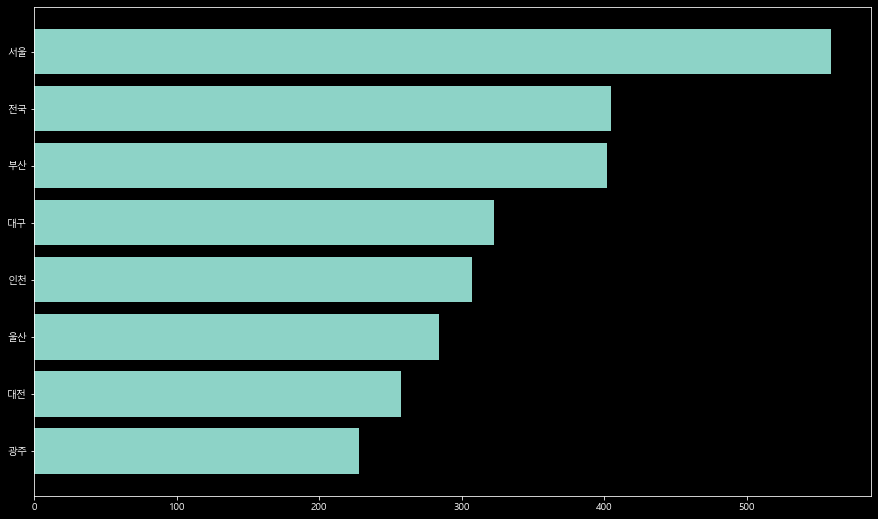

In [3]:
current_date = "2020-10"
a = KB.loc[current_date].iloc[0].sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(15, 9))
ax.barh(a.index, a)

In [4]:
group_dic = {'sido': ['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'],
        'group': ['전국','수도권','경상도','경상도','수도권','전라도',\
                  '충청도','경상도','충청도','수도권','강원도','충청도',\
                 '충청도','전라도','전라도','경상도','경상도','제주도']
        }
region_group_df = pd.DataFrame(group_dic, columns = ['sido', 'group'])
region_group_df["group"].drop_duplicates()

0      전국
1     수도권
2     경상도
5     전라도
6     충청도
10    강원도
17    제주도
Name: group, dtype: object

In [5]:
colors = dict(zip(
    ['전국', '수도권', '경상도', '전라도',
     '충청도', '강원도', '제주도'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))
group_lk = region_group_df.set_index('sido')['group'].to_dict()

Text(1, 0.4, '2016-01')

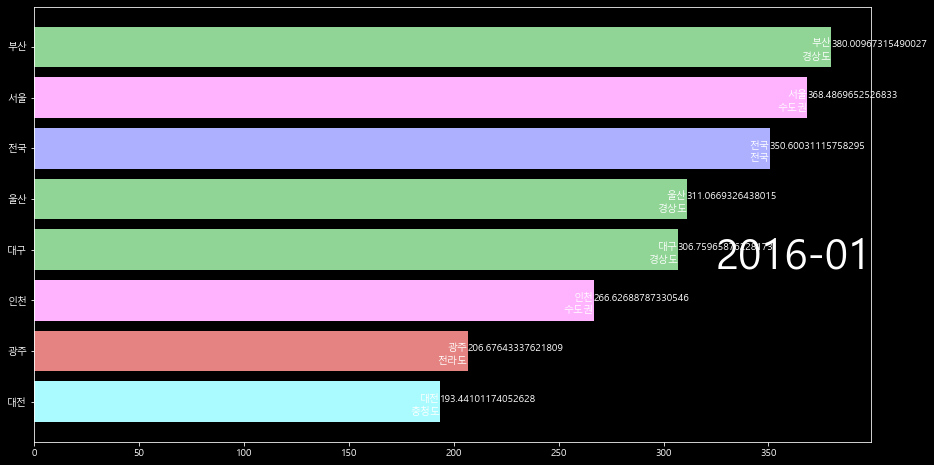

In [6]:
current_date = "2016-01"
KB_s = KB.loc[current_date].iloc[0].sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(KB_s.index, KB_s, color=[colors[group_lk[x]] for x in KB_s.index])

# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(KB_s, KB_s.index)):
    ax.text(value, i,     name,            ha='right')  # 서울: 시도
    ax.text(value, i-.25, group_lk[name],  ha='right')  # 수도권: 지역group
    ax.text(value, i,     value,           ha='left')   # 75.7: 매매지수
# Add year right middle portion of canvas
ax.text(1, 0.4, current_date, transform=ax.transAxes, size=42, ha='right')

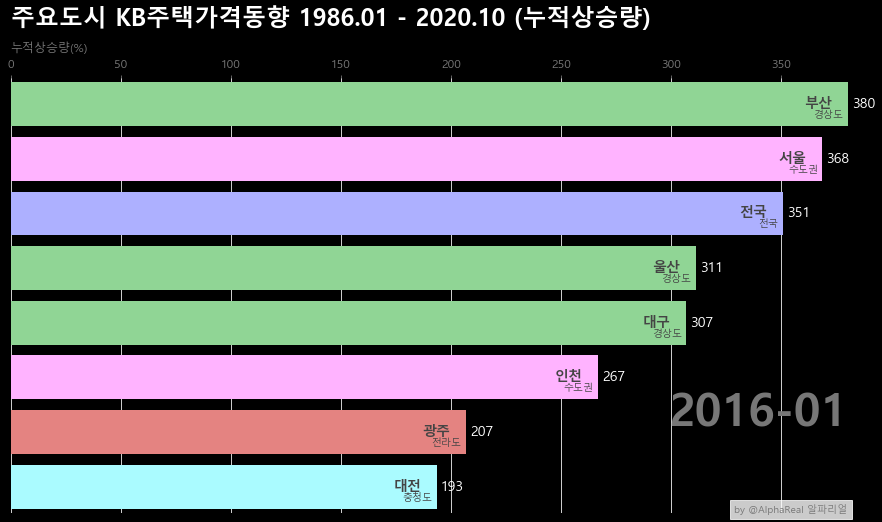

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(current_date):    
    KB_s = KB.loc[current_date].iloc[0].sort_values(ascending=True)   
    ax.clear()   
    ax.barh(KB_s.index, KB_s, color=[colors[group_lk[x]] for x in KB_s.index])    
    dx = KB_s.max() / 200
    for i, (value, name) in enumerate(zip(KB_s, KB_s.index)):
        ax.text(value-dx-5.0, i, name, size=14, color='#444444', weight=600, ha='right', va='center')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # polished styles
    ax.text(1, 0.2, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, '누적상승량(%)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, '주요도시 KB주택가격동향 1986.01 - 2020.10 (누적상승량)',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @AlphaReal 알파리얼', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart("2016-01")

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 10**8

fig, ax = plt.subplots(figsize=(15, 11))
animator = animation.FuncAnimation(fig, draw_barchart, frames=KB.index.strftime("%Y-%m"))
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()

In [ ]:
animator.save("KB_major_city_bar_char_race.html")